<a href="https://colab.research.google.com/github/SohaliBaisla/Amazon-ML-Hackathon/blob/main/Amazon_Hackathon.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount("/content/gdrive")

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
import numpy as np
import csv
import pandas as pd
import tensorflow as tf
from tensorflow.keras.preprocessing import text, sequence
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation
from tensorflow.keras.layers import Embedding
from tensorflow.keras.layers import Conv1D, GlobalMaxPooling1D, MaxPooling1D
from sklearn.model_selection import train_test_split
from keras.callbacks import EarlyStopping
from keras.optimizers import SGD, RMSprop, Adagrad, Adadelta, Adam, Adamax, Nadam
from sklearn.preprocessing import LabelEncoder

In [ ]:
data=pd.read_csv("/content/gdrive/MyDrive/Dataset/dataset/train.csv")

In [ ]:
data = data.dropna()
data.head()

,PRODUCT_ID,TITLE,BULLET_POINTS,DESCRIPTION,PRODUCT_TYPE_ID,PRODUCT_LENGTH
2,2765088,PRIKNIK Horn Red Electric Air Horn Compressor ...,"[Loud Dual Tone Trumpet Horn, Compatible With ...","Specifications: Color: Red, Material: Aluminiu...",7537,748.031495
3,1594019,ALISHAH Women's Cotton Ankle Length Leggings C...,[Made By 95%cotton and 5% Lycra which gives yo...,AISHAH Women's Lycra Cotton Ankel Leggings. Br...,2996,787.401574
5,2152929,HINS Metal Bucket Shape Plant Pot for Indoor &...,"[Simple and elegant, great for displaying indo...",HINS Brings you the most Elegant Looking Pot w...,5725,950.000000
7,2026580,Delavala Self Adhesive Kitchen Backsplash Wall...,[HIGH QUALITY PVC MATERIAL: The kitchen alumin...,<p><strong>Aluminum Foil Stickers-good kitchen...,6030,984.251967
9,2998633,Hexwell Essential oil for Home Fragrance Oil A...,[100% Pure And Natural Essential Oil Or Fragra...,"Transform your home, workplace or hotel room i...",8201,393.700787


In [ ]:
data1=pd.read_csv("/content/gdrive/MyDrive/Dataset/dataset/test.csv")

In [ ]:
data1.head()

,PRODUCT_ID,TITLE,BULLET_POINTS,DESCRIPTION,PRODUCT_TYPE_ID
0,604373,Manuel d'Héliogravure Et de Photogravure En Re...,NaN,NaN,6142
1,1729783,DCGARING Microfiber Throw Blanket Warm Fuzzy P...,[QUALITY GUARANTEED: Luxury cozy plush polyest...,<b>DCGARING Throw Blanket</b><br><br> <b>Size ...,1622
2,1871949,I-Match Auto Parts Front License Plate Bracket...,"[Front License Plate Bracket Made Of Plastic,D...",Replacement for The Following Vehicles:2020 LE...,7540
3,1107571,PinMart Gold Plated Excellence in Service 1 Ye...,[Available as a single item or bulk packed. Se...,Our Excellence in Service Lapel Pins feature a...,12442
4,624253,"Visual Mathematics, Illustrated by the TI-92 a...",NaN,NaN,6318


In [ ]:
sample_submission = pd.read_csv("/content/gdrive/MyDrive/Dataset/dataset/sample_submission.csv")

In [ ]:
sample_submission

,PRODUCT_ID,PRODUCT_LENGTH
0,604373,701.093794
1,1729783,734.506163
2,1871949,741.360258
3,1107571,730.327767
4,624253,666.847946
...,...,...
734731,921419,733.838809
734732,2456362,746.810825
734733,841529,691.127128
734734,1190194,757.643591


In [ ]:
x = data['TITLE'].astype('str')

In [ ]:
le = LabelEncoder()
y=le.fit_transform(data['PRODUCT_LENGTH'])
y=np.expand_dims(y, axis=1)

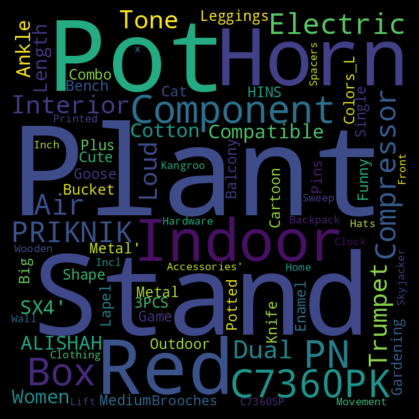

In [ ]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
comments = x.values
wordcloud = WordCloud(width = 640, height = 640, background_color = 'black',stopwords = STOPWORDS).generate(str(comments))
fig = plt.figure(figsize = (8, 4), facecolor = 'k', edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

In [ ]:
max_features = 200000
max_text_length = 400

In [ ]:
x_tokenizer =text.Tokenizer(max_features)
x_tokenizer.fit_on_texts(list(x))
x_tokenized = x_tokenizer.texts_to_sequences(x)
x_train_val = sequence.pad_sequences(x_tokenized, maxlen=max_text_length)

In [ ]:
x_tokenizer.word_index

{'for': 1,
 'with': 2,
 'cover': 3,
 'and': 4,
 'black': 5,
 'of': 6,
 'case': 7,
 '2': 8,
 '1': 9,
 'back': 10,
 'x': 11,
 'set': 12,
 '5': 13,
 "women's": 14,
 'printed': 15,
 'pack': 16,
 '3': 17,
 'blue': 18,
 'women': 19,
 'inch': 20,
 'white': 21,
 'size': 22,
 '4': 23,
 '6': 24,
 'home': 25,
 'cotton': 26,
 'wall': 27,
 'girls': 28,
 '8': 29,
 'soft': 30,
 'red': 31,
 'large': 32,
 "men's": 33,
 'in': 34,
 'designer': 35,
 'room': 36,
 'car': 37,
 'hard': 38,
 '10': 39,
 '7': 40,
 'compatible': 41,
 'color': 42,
 'pro': 43,
 '12': 44,
 'leather': 45,
 'samsung': 46,
 'green': 47,
 'galaxy': 48,
 'pink': 49,
 'light': 50,
 'decor': 51,
 'men': 52,
 'shirt': 53,
 'glass': 54,
 'kids': 55,
 'design': 56,
 'plastic': 57,
 'gift': 58,
 'sleeve': 59,
 'bag': 60,
 'kitchen': 61,
 't': 62,
 'long': 63,
 'm': 64,
 '9': 65,
 'grey': 66,
 'to': 67,
 'iphone': 68,
 'art': 69,
 'holder': 70,
 'living': 71,
 'steel': 72,
 'casual': 73,
 'brown': 74,
 'mobile': 75,
 'dress': 76,
 'small': 77,


In [ ]:
embedding_dim = 300
embedding_matrix = np.zeros((max_features, embedding_dim))
for word, index in x_tokenizer.word_index.items():
  if index>max_features -1:
    break
  else:
    embedding_vector = embedding_index.get(word)
    if embedding_vector is not None:
      embedding_matrix[index] = embedding_vector
del(embedding_vector)

In [ ]:
model = Sequential()
model.add(Embedding(max_features, embedding_dim, embeddings_initializer=tf.keras.initializers.Constant( embedding_matrix),trainable=False))
model.add(Dropout(0.2))

In [ ]:
filters = 250
kernel_size = 3
hidden_dims = 25000

In [ ]:
no_of_classes=len(data['PRODUCT_LENGTH'].unique())
no_of_classes

11570

In [ ]:
model.add(Conv1D(filters, kernel_size, padding='valid'))
model.add(MaxPooling1D())
model.add(Conv1D(filters, 5, padding='valid', activation='relu'))
model.add(GlobalMaxPooling1D())
model.add(Dense(hidden_dims, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(no_of_classes,activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 300)         60000000  
                                                                 
 dropout (Dropout)           (None, None, 300)         0         
                                                                 
 conv1d (Conv1D)             (None, None, 250)         225250    
                                                                 
 max_pooling1d (MaxPooling1D  (None, None, 250)        0         
 )                                                               
                                                                 
 conv1d_1 (Conv1D)           (None, None, 250)         312750    
                                                                 
 global_max_pooling1d (Globa  (None, 250)              0         
 lMaxPooling1D)                                         

In [ ]:
import tensorflow.keras as keras
opt = Adam(learning_rate=1e-3)
model.compile(loss=keras.losses.SparseCategoricalCrossentropy(),optimizer=opt,metrics=[keras.metrics.SparseCategoricalAccuracy()])

In [ ]:
x_train_val

array([[     0,      0,      0, ...,     41,      2,   9878],
       [     0,      0,      0, ...,     44,    576,    132],
       [     0,      0,      0, ...,   1092,    260,    119],
       ...,
       [     0,      0,      0, ...,      4,   1018,    226],
       [     0,      0,      0, ...,     11,     44,     20],
       [     0,      0,      0, ...,      1,   8702, 160855]], dtype=int32)

In [ ]:
print("shape of x is:",x_train_val.shape)
print("shape of y is:",y.shape)

shape of x is: (1038460, 400)
shape of y is: (1038460, 1)


In [ ]:
x_train, x_val, y_train, y_val = train_test_split(x_train_val, y, random_state=1, test_size=0.2)

In [ ]:
l = ["PRODUCT_ID", "PRODUCT_LENGTH"]
df_new = sample_submission[l]
df_new

In [ ]:
df_new.to_csv('/content/gdrive/MyDrive/Dataset/dataset/sample_submission.csv', index = False, header = True)

In [ ]:
sample_submission.PRODUCT_LENGTH = sample_submission.PRODUCT_LENGTH.round(7)

In [ ]:
sample_submission

,PRODUCT_ID,PRODUCT_LENGTH
0,604373,701.0938
1,1729783,734.5062
2,1871949,741.3603
3,1107571,730.3278
4,624253,666.8479
...,...,...
734731,921419,733.8388
734732,2456362,746.8108
734733,841529,691.1271
734734,1190194,757.6436
